# Import packages

In [353]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose

# Input data

[*********************100%%**********************]  1 of 1 completed


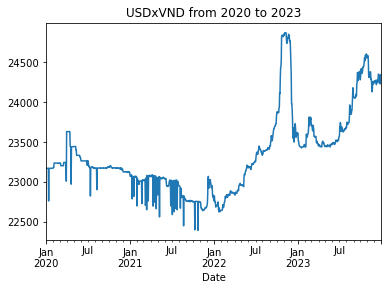

In [342]:
# Get data
data = yf.download('USDVND=X','2020-01-01','2023-12-31') # from 1 Jan 2021 to 31 December 2022

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2020 to 2023")
plt.show()

# Exponential smoothing

In [409]:
# Formatting and splitting dataset into train data and test data
df = pd.DataFrame(data, columns=['Adj Close'])
df.index = pd.to_datetime(df.index)
df.index.freq = 'b'
x = round(len(df)/3)
df_train = df.iloc[:-x]
df_test = df.iloc[-x:]

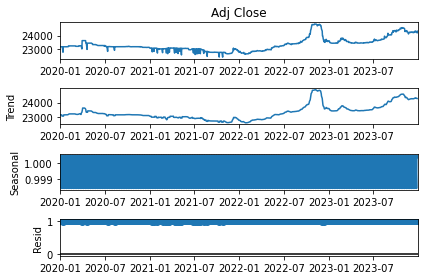

In [401]:
# Decompose
decompose_result = seasonal_decompose(df['Adj Close'], model = 'multiplicative')
decompose_result.plot();

#### Holt's Linear Smoothing
Use when there is trend in data, and no seasonality

<AxesSubplot:xlabel='Date'>

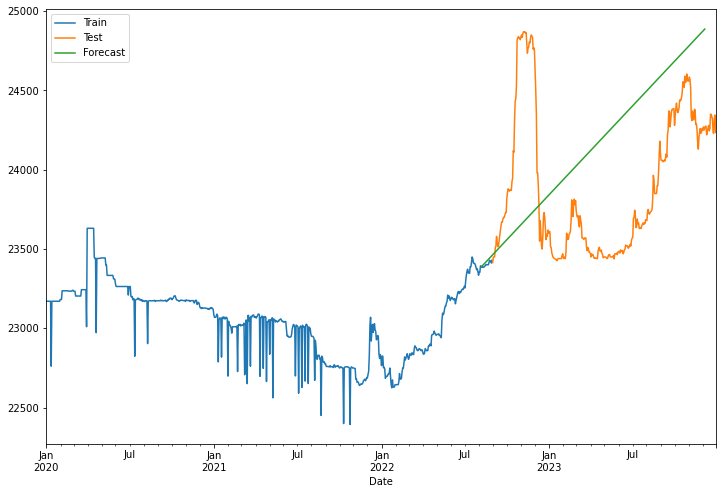

In [418]:
model = sm.tsa.ExponentialSmoothing(df_train['Adj Close'], trend='add', seasonal=None).fit().fittedvalues
pred = fitted.forecast(steps=x)

# Plot
df_train['Adj Close'].plot(legend=True, label='Train')
df_test['Adj Close'].plot(legend=True, label='Test', figsize = (12,8))
pred.plot(legend=True, label='Forecast')

#### Finding optimal alpha and gamma

In [434]:
optimal_alpha = None
optimal_gamma = None
best_mse = None

idx = df.iloc[:,:].values.astype('float32')
mean_results_for_all_possible_alpha_gamma_values = np.zeros((9,9))

for gamma in range(0,9):
    pt = idx[0][0]
    bt = idx[1][0] - idx[0][0]
    mean_for_alpha_gamma = np.zeros(len(idx))
    mean_for_alpha_gamma[0] = np.power(idx[0][0]-pt,2)
    for i in range(1,len(idx)):
            temp_pt = ((alpha+1)*0.1)*idx[i][0] + (1-(alpha+1)*0.1)*(pt+bt)
            bt = ((gamma+1)*0.1)*(temp_pt-pt)+(1-((gamma+1)*0.1))*bt
            pt = temp_pt
            mean_for_alpha_gamma[i] = np.power(idx[i][0]-pt,2)
    mean_results_for_all_possible_alpha_gamma_values[gamma][alpha] = np.mean(mean_for_alpha_gamma)
    optimal_gamma, optimal_alpha = np.unravel_index(np.argmin(mean_results_for_all_possible_alpha_gamme_values)
            
